In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
import spacy
import gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD 
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, model_selection,pipeline, manifold, preprocessing
from sklearn.feature_selection import chi2
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('C:/Users/CEMRE/Desktop/Resume.csv')


In [3]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [4]:
df.shape

(2484, 4)

In [5]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [9]:
#id sütununun silinmesi
df.drop("ID",axis=1,inplace=True)

In [10]:
df.drop("Resume_html", axis=1, inplace=True)

In [11]:
df.shape

(2484, 2)

In [12]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
CHEF                      118
ADVOCATE                  118
ACCOUNTANT                118
FINANCE                   118
ENGINEERING               118
AVIATION                  117
FITNESS                   117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

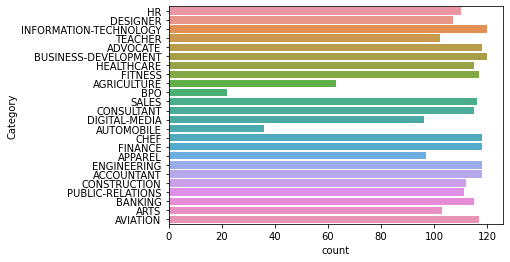

In [13]:
ax = sns.countplot(y=df['Category'], data=pd.read_csv('C:/Users/CEMRE/Desktop/Resume.csv'))

In [16]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
# Convert to list
data = df.Resume_str.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

[' HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINISTRATOR Summary Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist Accomplishments Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification Accomplished Trainer for cross server hospitality systems such as Hilton OnQ , Micros Opera PMS , Fidelio OPERA Reservation System (ORS) , Holidex Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment. Experience HR 

In [18]:
print(df.Resume_str.unique())

["         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss p

In [19]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['hr', 'administrator', 'marketing', 'associate', 'hr', 'administrator', 'summary', 'dedicated', 'customer', 'service', 'manager', 'with', 'years', 'of', 'experience', 'in', 'hospitality', 'and', 'customer', 'service', 'management', 'respected', 'builder', 'and', 'leader', 'of', 'customer', 'focused', 'teams', 'strives', 'to', 'instill', 'shared', 'enthusiastic', 'commitment', 'to', 'customer', 'service', 'highlights', 'focused', 'on', 'customer', 'satisfaction', 'team', 'management', 'marketing', 'savvy', 'conflict', 'resolution', 'techniques', 'training', 'and', 'development', 'skilled', 'multi', 'tasker', 'client', 'relations', 'specialist', 'accomplishments', 'missouri', 'dot', 'supervisor', 'training', 'certification', 'certified', 'by', 'ihg', 'in', 'customer', 'loyalty', 'and', 'marketing', 'by', 'segment', 'hilton', 'worldwide', 'general', 'manager', 'training', 'certification', 'accomplished', 'trainer', 'for', 'cross', 'server', 'hospitality', 'systems', 'such', 'as', 'hilto

In [20]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [22]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['administrator marketing associate administrator summary dedicate customer service manager year experience hospitality customer service management respect builder leader customer focus team strive instill share enthusiastic commitment customer service highlight focus customer satisfaction team management marketing savvy conflict resolution technique training development skilled client relation specialist accomplishment dot supervisor training certification certify customer loyalty marketing worldwide general manager training certification accomplish trainer cross server hospitality system such opera reservation system or holidex complete course seminar customer service sale strategy inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate administrator current company name city state help develop policy direct coordinate activity such employment compensation labor relation benefit training employee servi

In [24]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df[''], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Durdurma kelimeleri ve lemmatization kaldırıldıktan sonra soru metnindeki ilk 30 unigram"))
fig.show()

KeyError: 'özg'

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['Resume_str'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['Resume_str'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [28]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [29]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(data_vectorized)

In [30]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
support, network, management, server, application, software, use, datum, technology, business

Topic  1
customer, service, company, state, city, sale, maintain, skill, work, product

Topic  2
sale, business, management, new, product, development, client, company, marketing, team

Topic  3
financial, account, accounting, report, company, prepare, analysis, process, monthly, state

Topic  4
student, state, school, teacher, city, education, skill, company, art, work

Topic  5
food, kitchen, ensure, menu, staff, bar, prepare, maintain, service, serve

Topic  6
project, construction, work, design, company, city, management, state, manager, engineering

Topic  7
employee, management, training, program, resource, process, human, manager, state, staff

Topic  8
marketing, medium, company, city, event, state, communication, relation, design, public

Topic  9
patient, care, state, city, medical, health, provide, company, client, skill


In [31]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  5.120231098377672 %


In [32]:
df = df.rename(columns={"Category":"y", "Resume_str":"text"})
df.sample(5)

,text,y
745,REGISTERED NURSE Profession...,HEALTHCARE
2460,NON COMMISSIONED SECURITY OFFICER ...,AVIATION
1701,ENGINEERING INTERN Professional...,ENGINEERING
1635,FREELANCE DESIGNER Highlights...,APPAREL
1324,POLICY SERVICE SPECIALIST III ...,AUTOMOBILE


In [33]:
from sklearn import feature_extraction, model_selection,pipeline, manifold, preprocessing

In [45]:
def utils_preprocess_text=(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None)

SyntaxError: invalid syntax (<ipython-input-45-ab615bec39b9>, line 1)

In [46]:
df["text_clean"] = df["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

NameError: name 'utils_preprocess_text' is not defined

In [34]:
## split dataset
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)
## get target
y_train = df_train["y"].values
y_test = df_test["y"].values

In [35]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [37]:
corpus = df_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

KeyError: 'text_clean'